In [2]:
from obspy import read, Stream, UTCDateTime
import numpy as np
from mudpy.hfsims import windowed_gaussian, apply_spectrum
from mudpy.forward import gnss_psd
import matplotlib.pyplot as plt
import h5py
from glob import glob

In [3]:
gnss_arr_times = np.load('/hdd/Ridgecrest/summer23/minM4.3_gnss_arrival_times.npy')
i = np.where(gnss_arr_times[:,3] != 'nan')[0]
des_evts = np.unique(gnss_arr_times[i,0])
print(des_evts.shape)

(89,)


In [4]:
events_file = '/hdd/Ridgecrest/summer23/minM4.3_event_catalog.txt'

events = np.genfromtxt(events_file, dtype = 'str')

# Columns: 
# 0. ID
# 1. origin time
# 2. lon
# 3. lat
# 4. depth
# 5. mag

In [5]:
ids = events[:,0]
print(ids.shape)

(362,)


In [6]:
des_evt_idxs = []

for idx in range(len(des_evts)):
    des_evt = des_evts[idx]
#     print(des_evt)
    j = np.where(events[:,0] == des_evt)[0][0]
#     print(des_evt, events[j,0])
#     print(j)
    des_evt_idxs.append(j)

In [7]:
selected_catalog = events[des_evt_idxs]
stas = np.genfromtxt('/hdd/Ridgecrest/summer23/GNSS_stas.txt', usecols = [2], dtype = str)
chans = ['e', 'n', 'u']
eq_dates = np.genfromtxt('/hdd/Ridgecrest/summer23/GNSS_dates_w_eqs_only.txt', dtype = str)

In [8]:
eq_dates

array(['20190704', '20190705', '20190706', '20190707', '20190712',
       '20190716', '20190726', '20190822', '20190823', '20200604'],
      dtype='<U8')

In [9]:
eq_catalog_dates = selected_catalog[:,1]
eq_catalog_dates.shape

(89,)

In [10]:
ot_days = []

for idx in range(len(selected_catalog[:,1])):
    ot_day_split = selected_catalog[idx,1][:10].split('-')
    ot_day = ot_day_split[0] + ot_day_split[1] + ot_day_split[2]
    ot_days.append(ot_day)

In [11]:
new_dates = []

for idx in range(len(eq_catalog_dates)):
    date = eq_catalog_dates[idx]
#     print(date)
    new_date1 = date.split('-')
    new_date2 = new_date1[2].split('T')[0]
    new_date = new_date1[0] + new_date1[1] + new_date2
#     print(new_date)
    new_dates.append(new_date)
    
new_dates = np.unique(np.array(new_dates))
print(new_dates)

['20190605' '20190704' '20190705' '20190706' '20190707' '20190711'
 '20190712' '20190716' '20190717' '20190718' '20190726' '20190822'
 '20190823' '20191015' '20191217' '20200125' '20200201' '20200318'
 '20200323' '20200404' '20200411' '20200510' '20200515' '20200516'
 '20200517' '20200518' '20200519' '20200520' '20200522' '20200530'
 '20200531' '20200604' '20200619' '20200623' '20200624' '20200630'
 '20200706']


In [12]:
from os import path, makedirs
import os

In [13]:
project = 'summer23'
project_dir = '/hdd/Ridgecrest/' + project + '/'
daily_mseed_path = project_dir + 'daily_mseeds/' # Where are the daily mseeds?
gfast_test_mseed_path = project_dir + 'gfast_test_mseeds/' # Where to save the split mseeds?

if os.path.isdir(gfast_test_mseed_path):
    pass
else:
    os.makedirs(gfast_test_mseed_path)

In [14]:
date = '20190605'
i = np.where(date == np.array(ot_days))[0]
print(i)

[48]


In [15]:
selected_catalog

array([['37219156', '2019-07-06T03:22:48.300000Z', '-117.7365', '35.8910',
        '9.10', '4.64'],
       ['37219164', '2019-07-06T03:23:50.720000Z', '-117.6178', '35.8032',
        '11.44', '4.84'],
       ['37219172', '2019-07-06T03:25:27.970000Z', '-117.6708', '35.8607',
        '10.32', '4.61'],
       ['37219180', '2019-07-06T03:27:07.010000Z', '-117.7258', '35.9138',
        '8.00', '4.50'],
       ['37219484', '2019-07-06T03:22:17.100000Z', '-117.5457', '35.7480',
        '3.90', '4.55'],
       ['37219500', '2019-07-06T03:22:35.630000Z', '-117.4302', '35.6167',
        '9.35', '4.73'],
       ['37219564', '2019-07-06T03:27:11.370000Z', '-117.4313', '35.5303',
        '3.84', '4.57'],
       ['37224964', '2019-07-06T04:37:13.570000Z', '-117.7453', '35.9100',
        '8.01', '4.33'],
       ['37421229', '2019-07-06T03:57:50.900000Z', '-117.6613', '35.8690',
        '7.16', '4.31'],
       ['37445989', '2020-05-22T00:22:00.960000Z', '-117.7960', '38.2360',
        '5.21', '5.30']

In [16]:
np.array(ot_days).shape

(89,)

ACSB
e
20190605


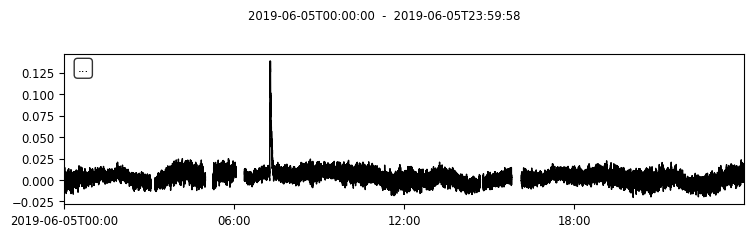

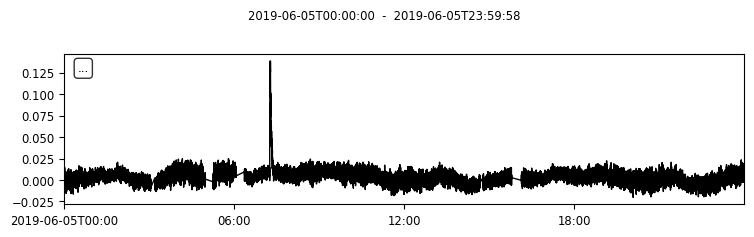

['2019-06-05T14:32:09.580000Z']
2019-06-05T14:32:09.580000Z
2019-06-05T14:32:09.580000Z
2019-06-05T14:34:16.580000Z


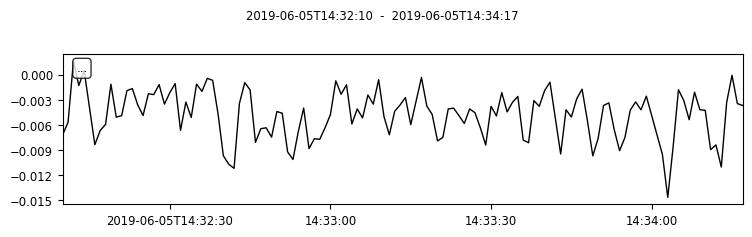

In [62]:
for sta in stas[:1]:
    
    print(sta)
    
    for chan in chans[:1]:
        
        print(chan)
        
        for date in new_dates[:1]:
            
            print(date)

            try:
                
#                 print(sta + '_' + chan + '_' + date)

                st = read(daily_mseed_path + sta + '/' + sta + '.' + chan + '.' + date + '.mseed')
                st.plot()
                st_copy = st.copy()
                st_merge = st_copy.merge(fill_value = 'interpolate')
                st_merge.plot()
#                 tr = st_merge.copy()[0]
#                 tr.plot()
                
                # Get the origin times for this date
        
#                 print(date)
                i = np.where(date == np.array(ot_days))[0]
                origin_times = selected_catalog[i,1]
                print(origin_times)
            
                for idx in range(len(origin_times)):
                    ot = UTCDateTime(origin_times[idx])
                    print(ot)
                    starttime = ot
                    endtime = ot + 127
                    print(starttime)
                    print(endtime)
                    
                    st_trim = st_merge.trim(starttime, endtime)
                    st_trim.plot()

                    gfast_test_mseed_sta_path = gfast_test_mseed_path + sta + '/'
                    gfast_test_mseed_chan_path = gfast_test_mseed_sta_path + chan + '_gfast_test_mseeds/'
                    gfast_test_mseed_date_path = gfast_test_mseed_chan_path + date + '/'

                    if os.path.isdir(gfast_test_mseed_sta_path):
                        pass
                    else:
                        os.makedirs(gfast_test_mseed_sta_path)

                    if os.path.isdir(gfast_test_mseed_chan_path):
                        pass
                    else:   
                        os.makedirs(gfast_test_mseed_chan_path)

                    if os.path.isdir(gfast_test_mseed_date_path):
                        pass
                    else:
                        os.makedirs(gfast_test_mseed_date_path)

                    st_trim.write(gfast_test_mseed_date_path + sta + '.' + chan + '.' + date + '.' + str(ot) + '.mseed', format = 'MSEED')

            except:
                pass
#                 print('Missing station, channel, or date')


In [17]:
# Format it

In [18]:
data_list = []
sta_list = []
date_list = []
starttime_list = []
endtime_list = []

for sta in stas:
    
#     print(sta)
        
    for date in new_dates:
        
#         print(date)

        try:
            
            i = np.where(date == np.array(ot_days))[0]
            origin_times = selected_catalog[i,1]
#             print(origin_times)

            for idx in range(len(origin_times)):
                
                ot = UTCDateTime(origin_times[idx])
#                 print(sta, date, ot)

                stN = read(gfast_test_mseed_path + sta + '/n_gfast_test_mseeds/' + date + '/' + sta + '.n.' + date + '.' + str(ot) + '.mseed')
                stE = read(gfast_test_mseed_path + sta + '/e_gfast_test_mseeds/' + date + '/' + sta + '.e.' + date + '.' + str(ot) + '.mseed')
                stZ = read(gfast_test_mseed_path + sta + '/u_gfast_test_mseeds/' + date + '/' + sta + '.u.' + date + '.' + str(ot) + '.mseed')
                
#                 stN.plot()
                
                N_data = stN[0].data
                E_data = stE[0].data
                Z_data = stZ[0].data
                
                comb_data = np.append(N_data, E_data)
                comb_data = np.append(comb_data, Z_data) # Order: N, E, Z
                
#                 print(comb_data.shape)
                if comb_data.shape != (384,):
                    continue

                data_list.append(comb_data)
                
                starttime = stN[0].stats.starttime
#                 print(starttime)
                endtime = stN[0].stats.endtime
#                 print(endtime)
                
                sta_list.append(sta)
                date_list.append(date)
                starttime_list.append(str(starttime))
                endtime_list.append(str(endtime))
            
        except:
            pass

In [19]:
np.array(data_list).shape

(5610, 384)

In [21]:
data_array = np.array(data_list)
print('Data array shape:')
print(data_array.shape) # should be something by 384

info_array = np.column_stack((np.array(sta_list), np.array(date_list), np.array(starttime_list), np.array(endtime_list)))
print('Info array shape:')
print(info_array.shape)

h5f = h5py.File(project_dir + 'gfast_test_realdata_data.hdf5', 'w') 
h5f.create_dataset('realdata_data', data = data_array)
h5f.close()

np.save(project_dir + 'gfast_test_realdata_info.npy', info_array) 

Data array shape:
(5610, 384)
Info array shape:
(5610, 4)


In [7]:
project_name = 'newfault'
GF_list = 'rc_gflist.gflist' # Station file used in fq gen code
vel_mod = 'mojave'
stas_name = GF_list.split('.')[0]
fq_dir = '/hdd/rc_fq/fall24/' + project_name + '/'
arrival_save_dir = '/hdd/rc_fq/fall24/' + project_name + '_fq_parrivals/'

all_ruptures = np.load('/hdd/rc_fq/fall24/' + project_name + '_ruptures.npy')
extra_second_rupts = ['newfault.000474', 'newfault.001647', 'newfault.001745', 'newfault.002078', 'newfault.002165', 'newfault.002607', 'newfault.002911', 'newfault.003012']

stas = np.load('/hdd/rc_fq/fall24/' + stas_name + '_station_names.npy')
test_stas = ['P595', 'P594', 'CCCC']
# print(stas)

results = np.load('/home/sdybing/gnss-picker/cnn_models_outputs/newfault_fq_train/models/traindate_2024-10-01/data/2024-10-02_fqtest_metadata.npy')

In [8]:
results

array([['newfault.001132', 'NHRG', '6.3333'],
       ['newfault.000179', 'P462', '7.0808'],
       ['nan', 'nan', 'nan'],
       ...,
       ['newfault.002773', 'BKAP', '4.7904'],
       ['newfault.000388', 'P091', '7.0220'],
       ['newfault.003291', 'P289', '4.3230']], dtype='<U32')

In [9]:
# mags_765 = []
# rupts_765 = []

# for idx in range(len(all_ruptures)):
    
#     rupt = all_ruptures[idx]
    
#     log = glob(fq_dir + 'output/ruptures/' + rupt + '.log')
#     log = open(log[0],'r')
#     line = log.readlines()
    
#     mag = str(line[15][21:27])
    
#     if float(mag) >= 7.65:
# #         print(mag)
# #         print(rupt)
#         rupts_765.append(rupt)
        
# print(rupts_765)

# rupts_6 = []

# for idx in range(len(all_ruptures)):
    
#     rupt = all_ruptures[idx]
    
#     log = glob(fq_dir + 'output/ruptures/' + rupt + '.log')
#     log = open(log[0],'r')
#     line = log.readlines()
    
#     mag = str(line[15][21:27])
    
#     if float(mag) >= 6:
# #         print(mag)
# #         print(rupt)
#         rupts_6.append(rupt)
        
# # print(rupts_6)

rupts_3 = []

for idx in range(len(all_ruptures)):
    
    rupt = all_ruptures[idx]
    
    log = glob(fq_dir + 'output/ruptures/' + rupt + '.log')
    log = open(log[0],'r')
    line = log.readlines()
    
    mag = str(line[15][21:27])
    
    if float(mag) >= 3:
#         print(mag)
#         print(rupt)
        rupts_3.append(rupt)
        
# print(rupts_3)

In [10]:
# Reformatting FQ data so that they start at the origin time and go for 128 seconds

len_new_data_array = 0

# for idx in range(len(rupts_765)):
#     rupt = rupts_765[idx]
#     q = np.where(results[:,0] == rupt)[0]
#     stas_in_testing = results[q,1]
# #     print(rupt)
# #     print(stas_in_testing)
# #     print(len(stas_in_testing))
#     len_new_data_array += len(stas_in_testing)

# ruptures = rupts_765

# for idx in range(len(rupts_6)):
#     rupt = rupts_6[idx]
#     q = np.where(results[:,0] == rupt)[0]
#     stas_in_testing = results[q,1]
# #     print(rupt)
# #     print(stas_in_testing)
# #     print(len(stas_in_testing))
#     len_new_data_array += len(stas_in_testing)    

# ruptures = rupts_6

ruptures = rupts_3

for idx in range(len(rupts_3)):
    rupt = rupts_3[idx]
    q = np.where(results[:,0] == rupt)[0]
    stas_in_testing = results[q,1]
#     print(rupt)
#     print(stas_in_testing)
#     print(len(stas_in_testing))
    len_new_data_array += len(stas_in_testing)    

ruptures = rupts_3

print(len_new_data_array)

origin_time = UTCDateTime('2019-07-06T03:19:53.040000Z')
print(origin_time)

new_data_array = np.zeros((len_new_data_array, 128*3))
print(new_data_array.shape)

mag_list = []
sta_list = []
rupt_list = []
arr_idx_list = []

# data_list = []

counter = 0
new_array_counter = -1

for idx in range(len(ruptures)):
    
    rupt = ruptures[idx]
    q = np.where(results[:,0] == rupt)[0]
    stas_in_testing = results[q,1]
    
    counter += 1
    if counter % 10 == 0:
        print('Rupture ' + rupt + ' (' + str(counter) + '/' + str(len(ruptures)) + ')')
    
    log = glob(fq_dir + 'output/ruptures/' + rupt + '.log')
    log = open(log[0],'r')
    line = log.readlines()
    
    mag = str(line[15][21:27])
#     print(mag)
    
#     print('Origin time:')
#     print(origin_time)
    
    for idx2 in range(len(stas_in_testing)):
        
        new_array_counter += 1
        
        sta = stas_in_testing[idx2]
        
#         print(sta)
        arrivals = np.genfromtxt(arrival_save_dir + stas_name + '_arrival_times_' + rupt + '.csv', dtype = 'U')
#         print(arrivals)
            
        # Read in data 
        
        stN = read(fq_dir + 'output/waveforms/' + rupt + '/' + sta + '.LYN.sac') 
        stE = read(fq_dir + 'output/waveforms/' + rupt + '/' + sta + '.LYE.sac') 
        stZ = read(fq_dir + 'output/waveforms/' + rupt + '/' + sta + '.LYZ.sac') 
        
        # Get arrival time
        
        stas_arrival = arrivals[:,1] # Station list from arrivals file
        i = np.where(stas_arrival == sta)[0]
        arrival = arrivals[i,2][0]
        arr_time = UTCDateTime(arrival)
#         print(arrival)

        ### Trim around the origin time
        
        starttime = origin_time
        endtime = starttime + 127
        
        stN_trim = stN.trim(starttime, endtime)
        stE_trim = stE.trim(starttime, endtime)
        stZ_trim = stZ.trim(starttime, endtime)
        
#         print(stN_trim[0].stats.npts)
        
        stN_trim_data = stN_trim[0].data
        stE_trim_data = stE_trim[0].data
        stZ_trim_data = stZ_trim[0].data
        
#         print(stN_trim_data.shape)
        
#         print(arr_time)
#         print(origin_time)
        arrival_idx = int(round(arr_time - starttime))
#         print(arrival_idx)
        
        ### Combine N, E, and Z components into one array ###
        
        comb_data = np.append(stN_trim_data, stE_trim_data)
        comb_data = np.append(comb_data, stZ_trim_data) # Order: N, E, Z
        
        new_data_array[new_array_counter] = comb_data
        
#         plt.plot(comb_data) # Checking to make sure everything lines up
#         plt.show();
        
        ### Add magnitude to list
        
        rupt_list.append(str(rupt))
        sta_list.append(str(sta))
        mag_list.append(str(mag))
        arr_idx_list.append(str(arrival_idx))
        

45870
2019-07-06T03:19:53.040000Z
(45870, 384)
Rupture newfault.000009 (10/3300)
Rupture newfault.000019 (20/3300)
Rupture newfault.000029 (30/3300)
Rupture newfault.000039 (40/3300)
Rupture newfault.000049 (50/3300)
Rupture newfault.000059 (60/3300)
Rupture newfault.000069 (70/3300)
Rupture newfault.000079 (80/3300)
Rupture newfault.000089 (90/3300)
Rupture newfault.000099 (100/3300)
Rupture newfault.000109 (110/3300)
Rupture newfault.000119 (120/3300)
Rupture newfault.000129 (130/3300)
Rupture newfault.000139 (140/3300)
Rupture newfault.000149 (150/3300)
Rupture newfault.000159 (160/3300)
Rupture newfault.000169 (170/3300)
Rupture newfault.000179 (180/3300)
Rupture newfault.000189 (190/3300)
Rupture newfault.000199 (200/3300)
Rupture newfault.000209 (210/3300)
Rupture newfault.000219 (220/3300)
Rupture newfault.000229 (230/3300)
Rupture newfault.000239 (240/3300)
Rupture newfault.000249 (250/3300)
Rupture newfault.000259 (260/3300)
Rupture newfault.000269 (270/3300)
Rupture newfault.

In [11]:
new_data_array.shape

(45870, 384)

In [12]:
print(len(arr_idx_list))

45870


In [13]:
print('New data array shape:')
print(new_data_array.shape) # Arrivals at samples 128, 384, 640
# print(data_array[0])

rupt_array = np.array(rupt_list)
# print(rupt_array.shape)

sta_array = np.array(sta_list)
# print(sta_array.shape)

mag_array = np.array(mag_list)
# print(mag_array.shape)

arridx_array = np.array(arr_idx_list)
# print(mag_array.shape)

info_array = np.column_stack((rupt_array, sta_array, mag_array, arridx_array))
print('Info array shape:')
print(info_array.shape)
print(info_array[-1])

New data array shape:
(45870, 384)
Info array shape:
(45870, 4)
['newfault.003299' 'P812' '3.9523' '13']


In [14]:
h5f = h5py.File('/hdd/rc_fq/fall24/' + project_name + '_gfast_test_alltestdata.hdf5', 'w')
h5f.create_dataset('data', data = new_data_array)
h5f.close()

np.save('/hdd/rc_fq/fall24/' + project_name + '_gfast_test_alltestdata_info.npy', info_array) 